## Prova 1
### Alunos:
 - Bruno Gomes Coelho       - 9791160
 - Bruno Mendes da Costa - 9779433
 

In [0]:
# Download do dataset
!wget https://raw.githubusercontent.com/BrunoxD/machineLearning/master/Prova1A/bank.csv -qO bank.csv

In [0]:
# Updating Seaborn
!pip3 install -qU seaborn

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split



---



# Q1

## Caso 1

In [0]:
np.random.RandomState(seed=42)
X = np.random.rand(1000, 3)
e = np.random.normal(size=1000)

x1 = X[:, 0]
x2 = X[:, 1]
x3 = X[:, 2]

In [0]:
y1 = 0.1 + 0.1*x1 + 0.1*x2 + 0.1*x3 + 0.1*e
y2 = 0.5 + 0.5*x1 + 0.5*x2 + 0.5*x3 + 0.1*e
y3 = 1 + x1 + x2 + x3 + 0.1*e
y4 = 10 + 10*x1 + 10*x2 + 10*x3 + 0.1*e

all_y = [y1, y2, y3, y4]

In [0]:
all_preds = []

for yi in all_y:
    clf = LinearRegression()
    all_preds.append(clf.fit(X, yi).predict(X))


In [0]:
def result(y, y_pred, name):
    print(name)
    print("Var:", y.var()) 
    print("MAE:", mean_absolute_error(y, y_pred))
    print("MSE:", mean_squared_error(y, y_pred))
    print("R2:", r2_score(y, y_pred))
    print()
    
    

In [8]:
names = ["Y1 - X coef = 0.1", "Y2 - X coef = 0.5", "Y3 - X coef = 1", "Y4 - X coef = 10"]

for yi, yi_pred, name in zip(all_y, all_preds, names):
    result(yi, yi_pred, name)


Y1 - X coef = 0.1
Var: 0.011849270894724402
MAE: 0.07639186483373492
MSE: 0.009097235274524525
R2: 0.23225358291244347

Y2 - X coef = 0.5
Var: 0.07763629611637583
MAE: 0.07639186483373492
MSE: 0.009097235274524529
R2: 0.8828223945551461

Y3 - X coef = 1
Var: 0.2834313885006513
MAE: 0.07639186483373488
MSE: 0.009097235274524522
R2: 0.9679032187555203

Y4 - X coef = 10
Var: 27.464392114287726
MAE: 0.07639186483373471
MSE: 0.009097235274524532
R2: 0.999668762547641





---



## Caso 2


In [0]:
def generate_y(value):
    return value + value*x1 + value*x2 + value*x3 + value*e

new_y1 = generate_y(0.01)
new_y2 = generate_y(1)
new_y3 = generate_y(10)
new_y4 = generate_y(100)

new_all_y = [new_y1, new_y2, new_y3, new_y4]

In [0]:
new_all_preds = []

for yi in new_all_y:
    clf = LinearRegression()
    new_all_preds.append(clf.fit(X, yi).predict(X))


In [11]:
names = ["new Y1 - coefs = 0.01", "new Y2 - coefs = 1", "new Y3 - coefs = 10", "new Y4 - coefs = 100"]
for yi, yi_pred, name in zip(new_all_y, new_all_preds, names):
    result(yi, yi_pred, name)


new Y1 - coefs = 0.01
Var: 0.00011849270894724401
MAE: 0.0076391864833734915
MSE: 9.097235274524525e-05
R2: 0.23225358291244325

new Y2 - coefs = 1
Var: 1.18492708947244
MAE: 0.7639186483373491
MSE: 0.9097235274524526
R2: 0.23225358291244325

new Y3 - coefs = 10
Var: 118.49270894724401
MAE: 7.639186483373492
MSE: 90.97235274524526
R2: 0.23225358291244336

new Y4 - coefs = 100
Var: 11849.270894724403
MAE: 76.39186483373493
MSE: 9097.235274524524
R2: 0.23225358291244347





---



## Caso 3


No caso 1, podemos observar que os erros MAE e MSE apresentaram o mesmo valor entre as 4 funções. Isso se deve ao fato de que estamos sempre criando a mesma regressão linear (pois os dados continuam linearmente separáveis), apenas mudando a escala dos coeficientes da reta. No caso do score R2, observamos uma melhora confome aumentamos o multiplicador dos Xi. Isso é devido ao fato que o modelo consegue explicar sempre uma quantidade crescente do y dado o seu X, pois diminuimos o papel da aleatoriadade ao manter seu coeficiente constante e aumentar os coeficiente do Xi.

---

No caso 2, observamos que os erros MAE e MSE apresentaram o mesmo valor, porém em escala diferente. Isto é, ao multiplicar todos os coeficientes por 100, o MAE/MSE aumenta 100 vezes. Isso ocorre pois estamos apenas aumentando a escala do Y ao usar coeficientes constantes mas crescentes, o que após tirar a média (com ou sem raiz) aumenta a escala do MAE/MSE proporcionalmente. 
O R2 score se manteve igual em todas as funções pois a proporção de aleatoriedade cresce junto com os coeficientes de Xi.



---


# Q2

In [12]:
df = pd.read_csv("bank.csv")
df.head()

,age,balance,day,duration,default_bool,housing_bool,loan_bool,previous_cleaned,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,campaign_cleaned,y
0,30,1787,19,79,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,1.0,0
1,33,4789,11,220,0,1,1,4,0,0,...,0,1,0,0,0,0,0,0,1.0,0
2,35,1350,16,185,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1.0,0
3,30,1476,3,199,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,4.0,0
4,59,0,5,226,0,1,0,0,1,0,...,0,1,0,0,0,0,0,1,1.0,0


In [13]:
# Não ha nulos
df.isna().sum().sum()

0

## Item 1

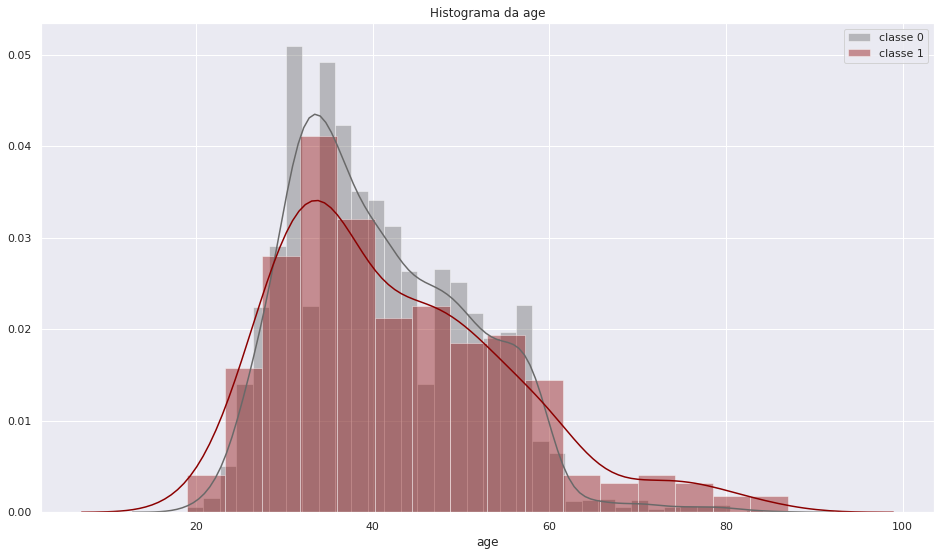

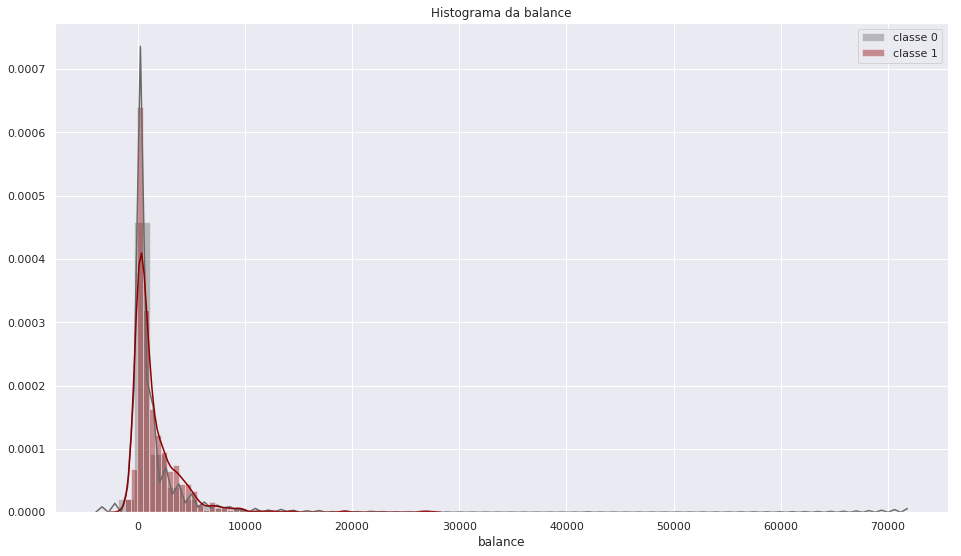

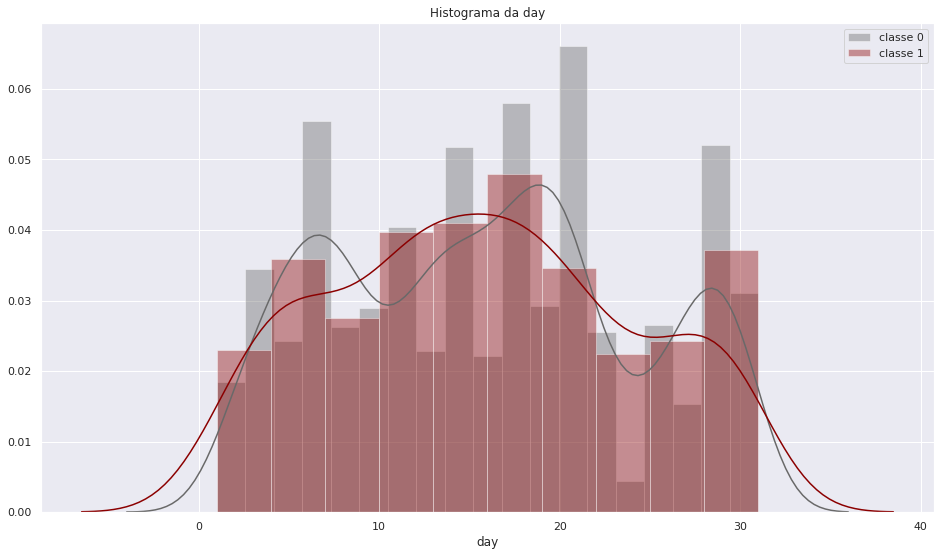

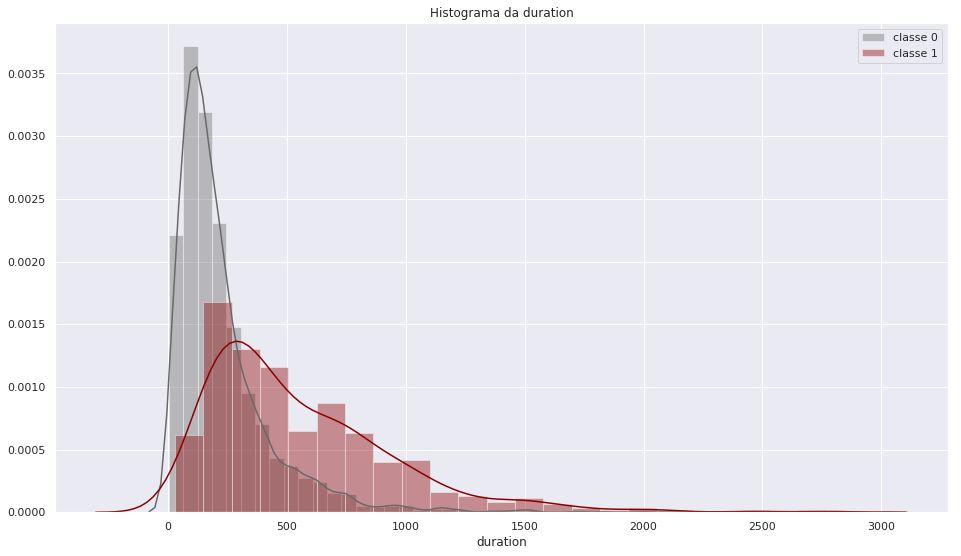

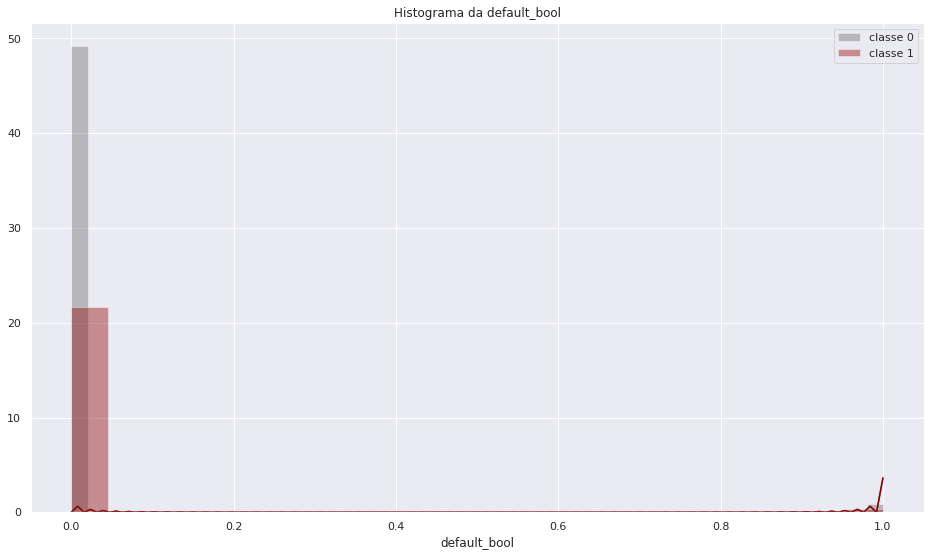

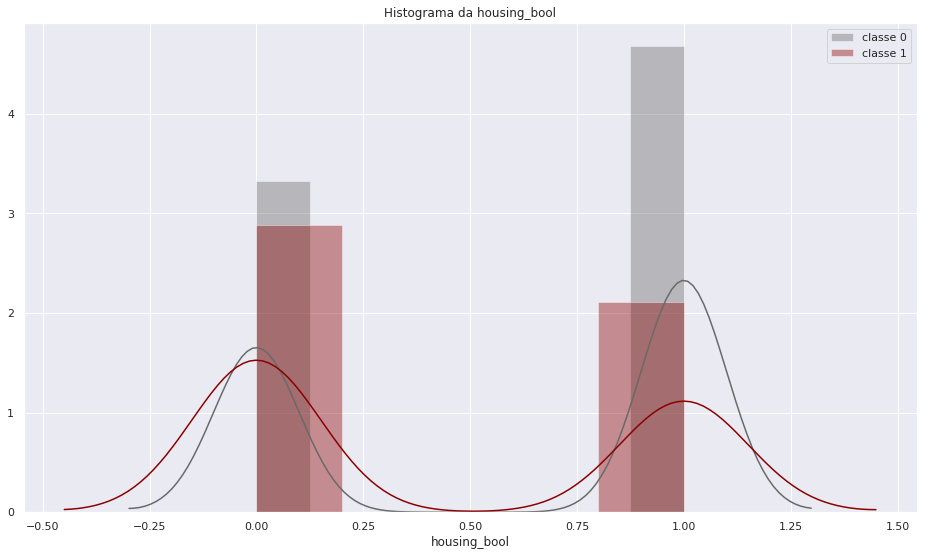

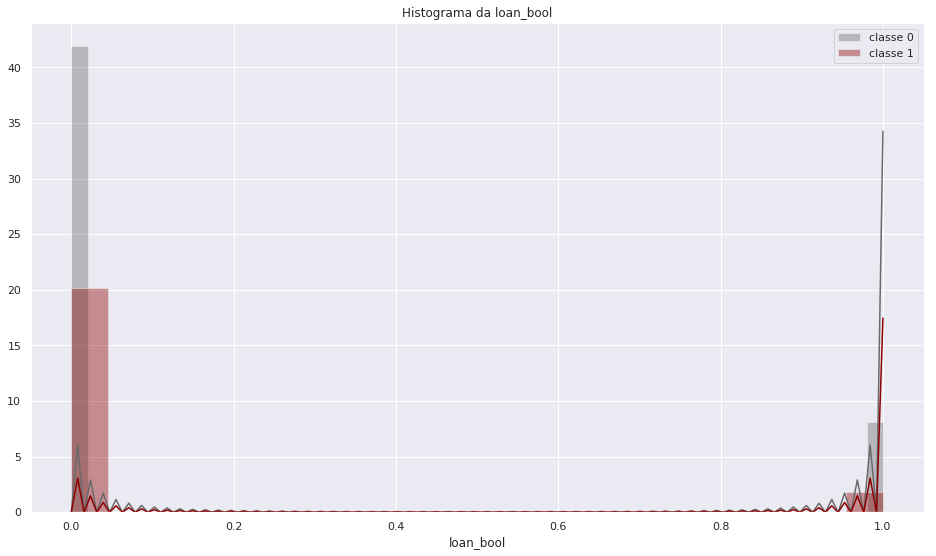

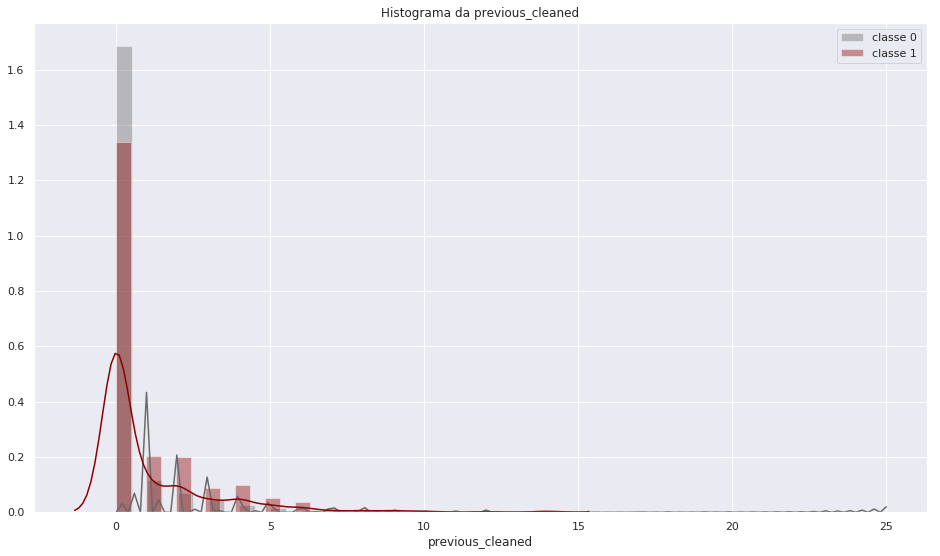

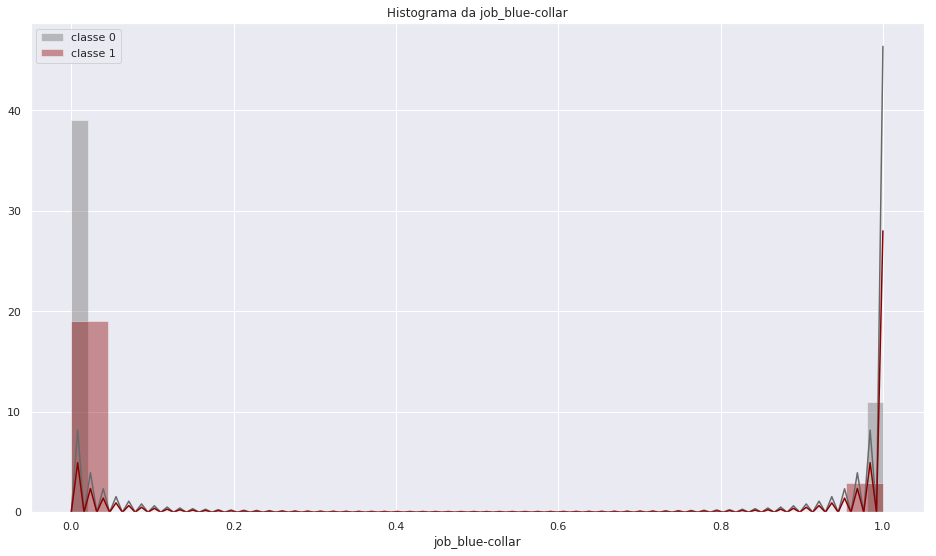

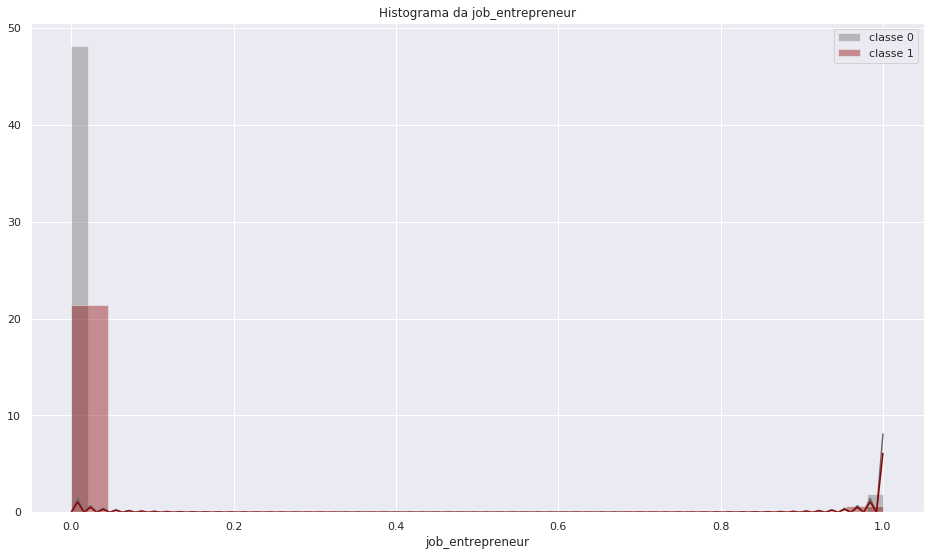

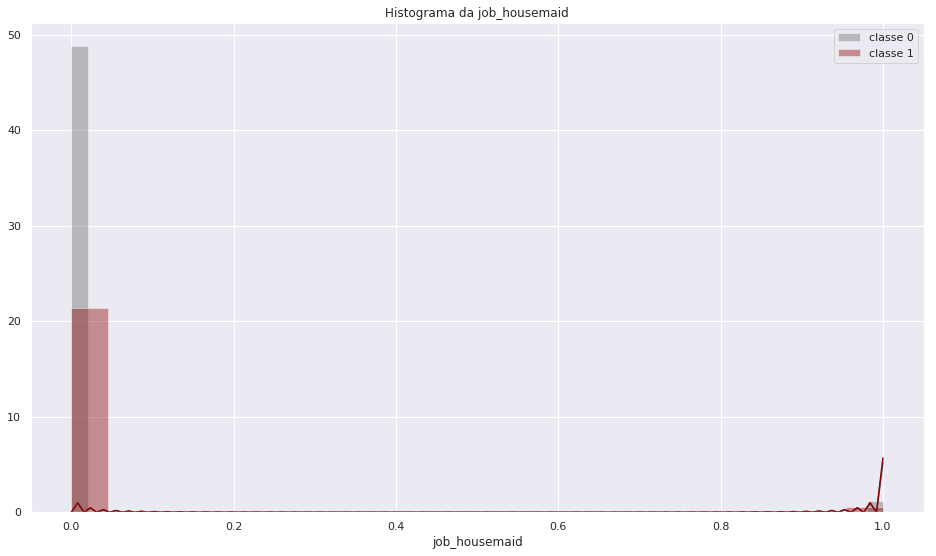

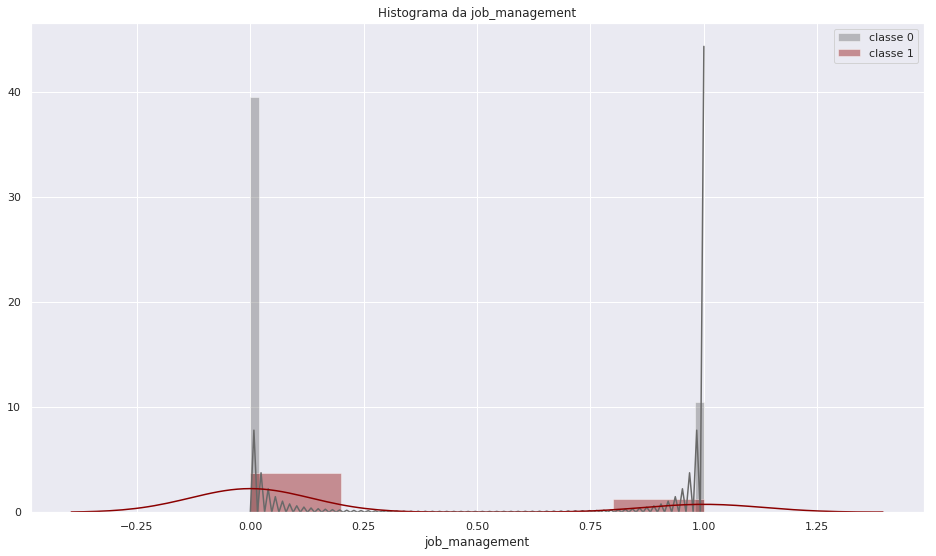

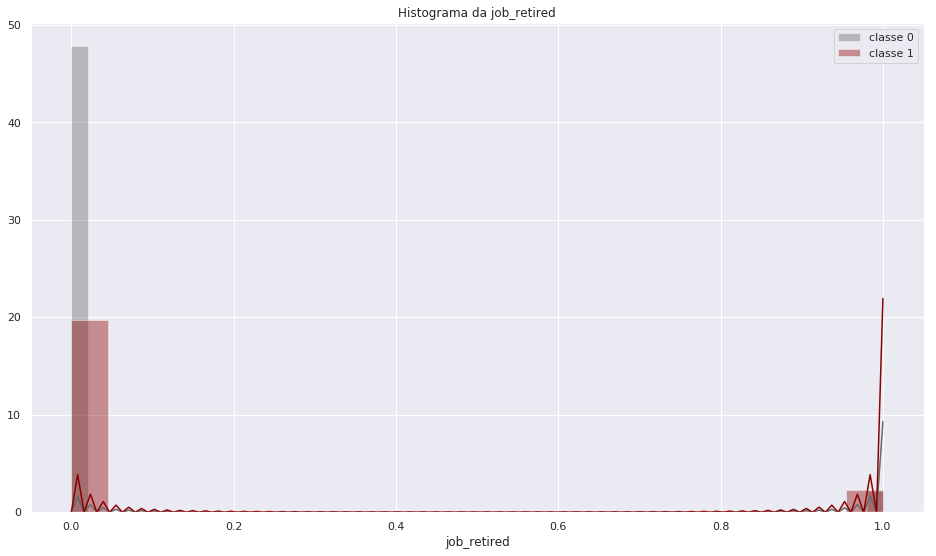

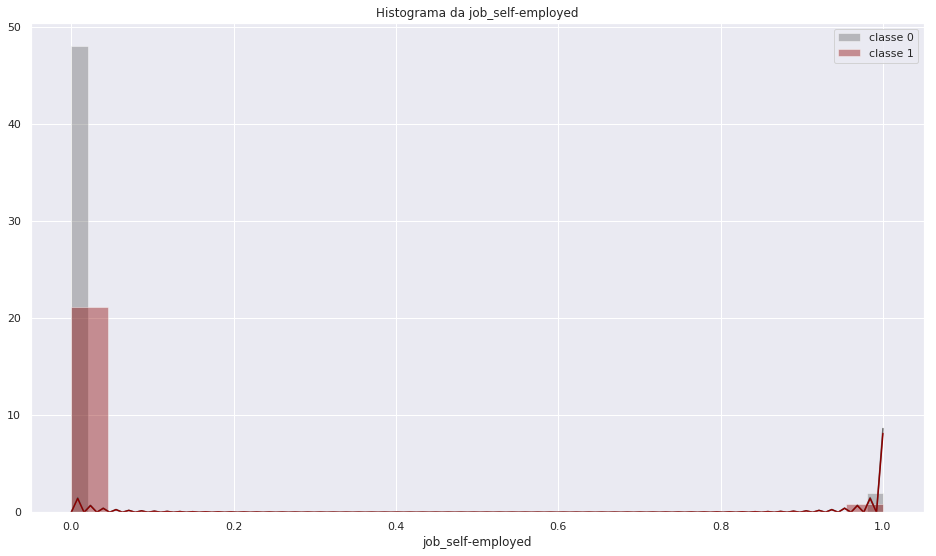

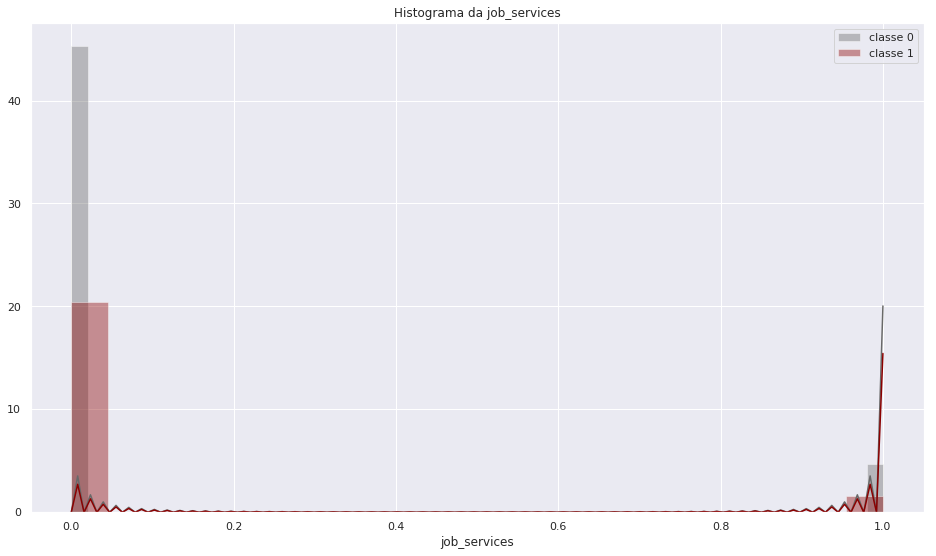

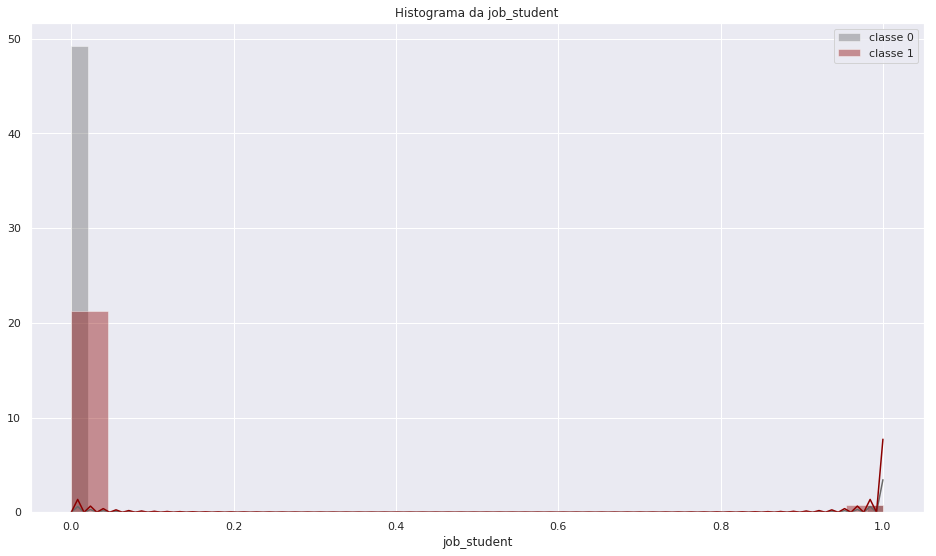

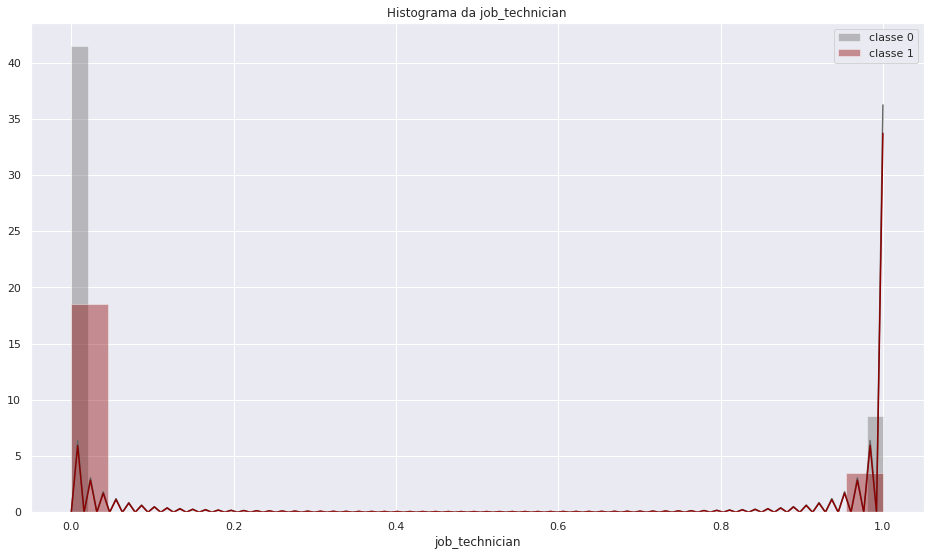

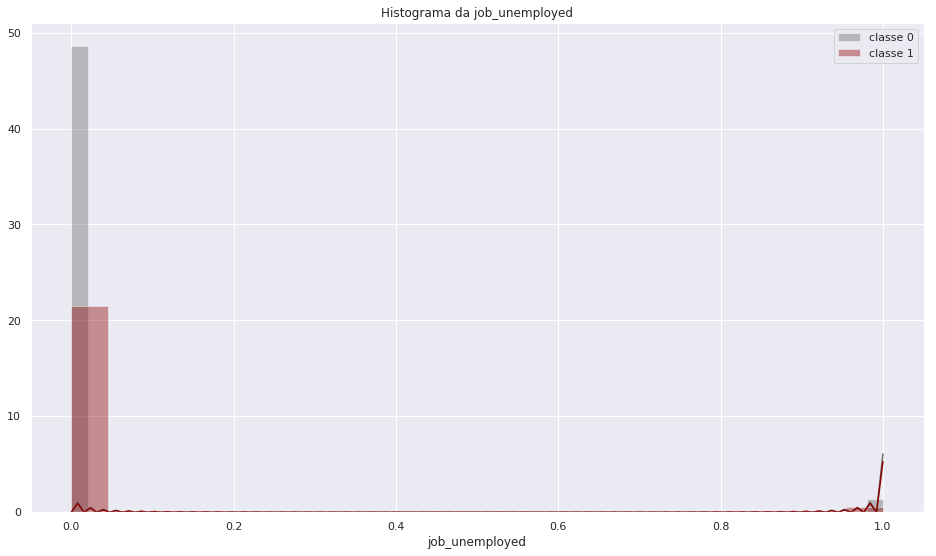

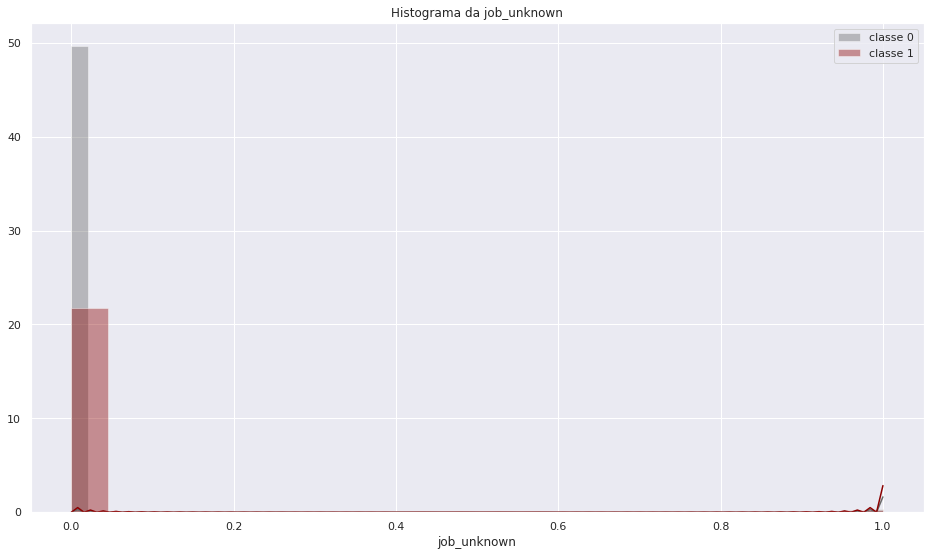

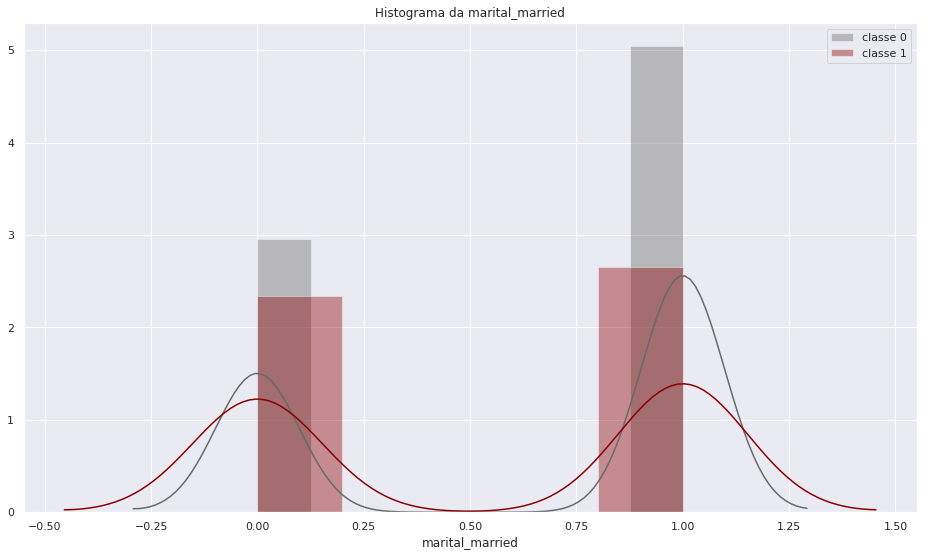

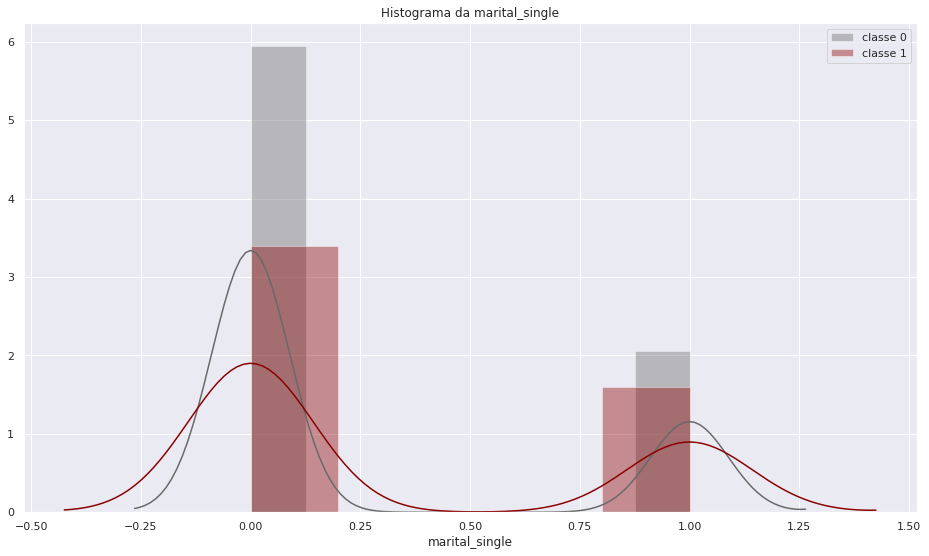

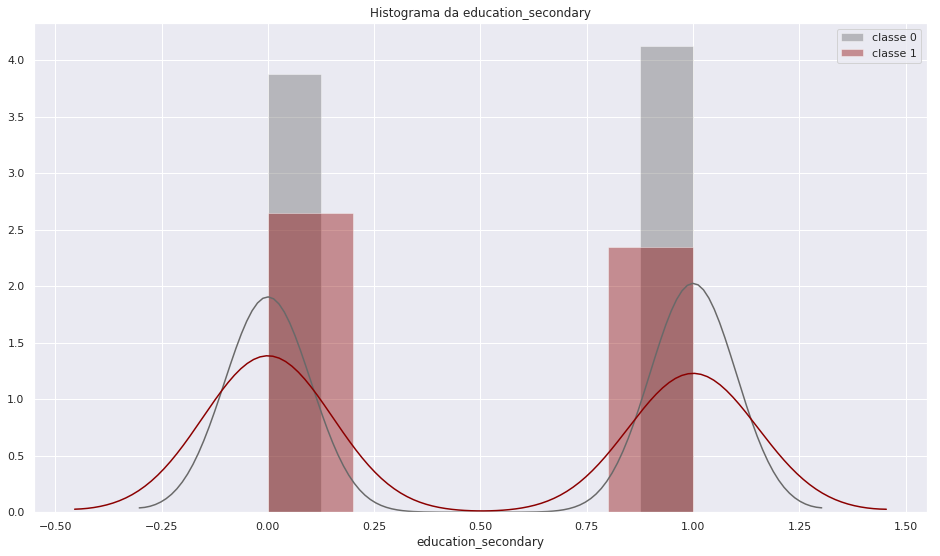

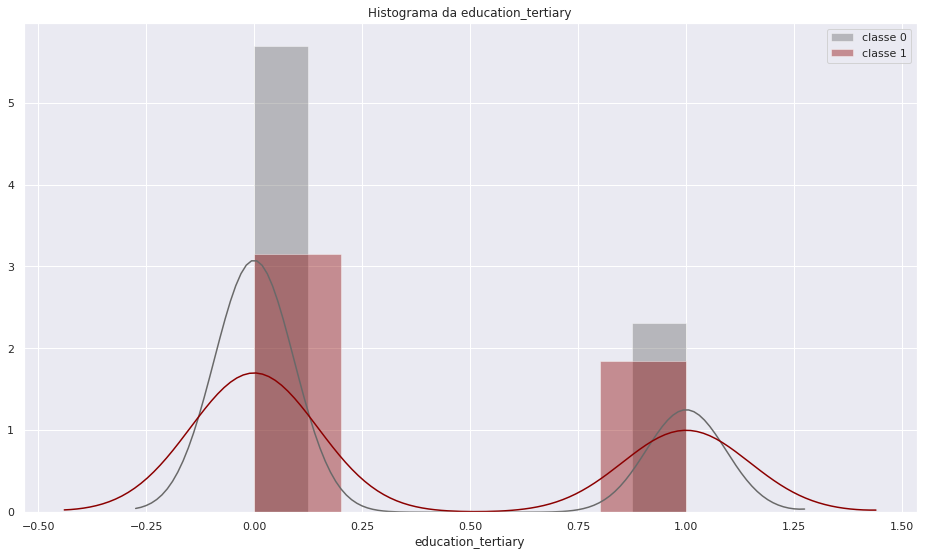

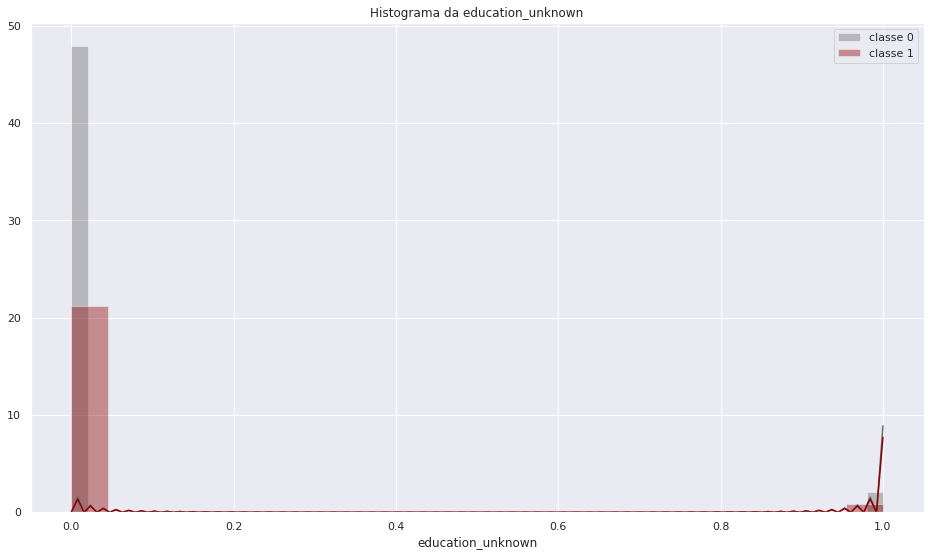

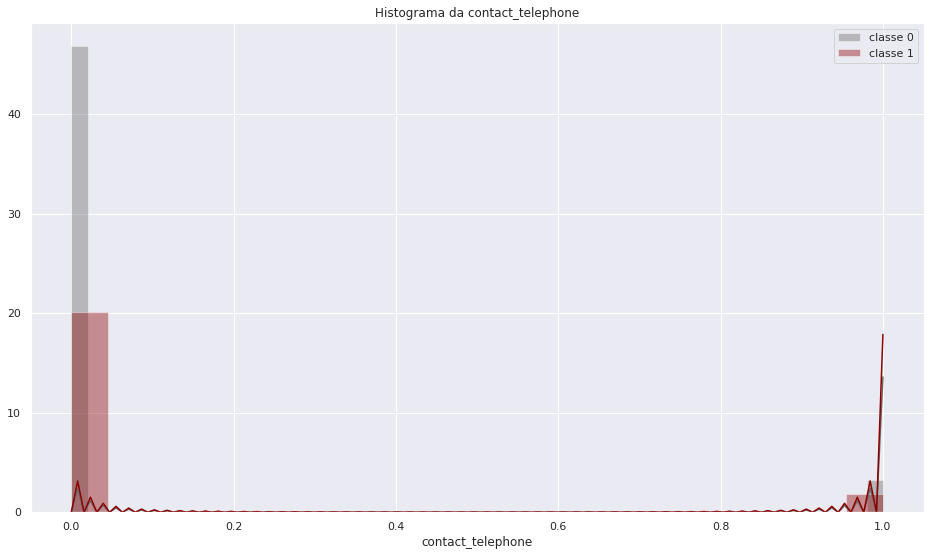

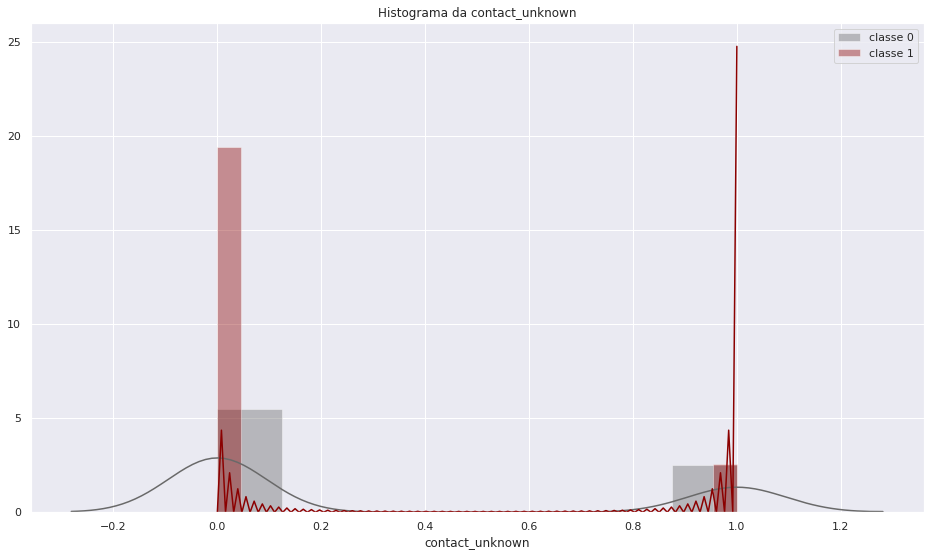

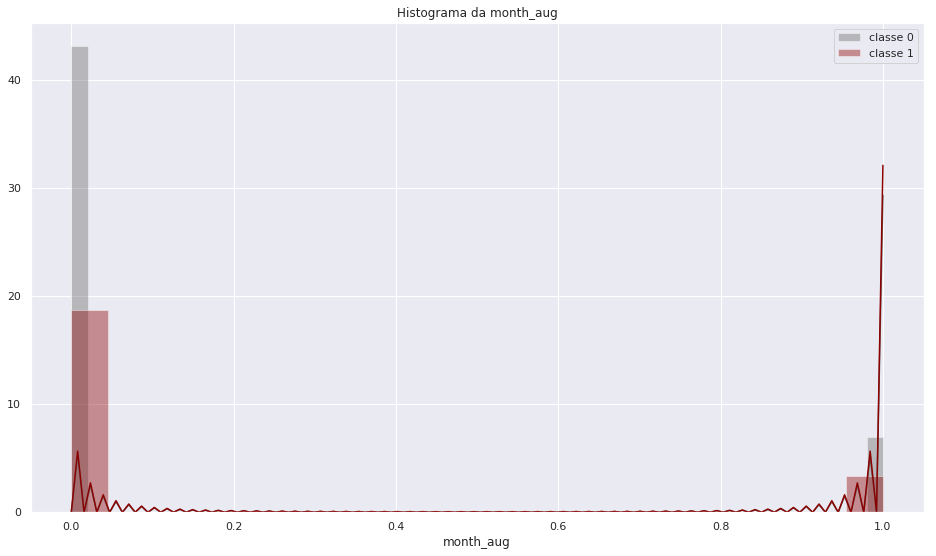

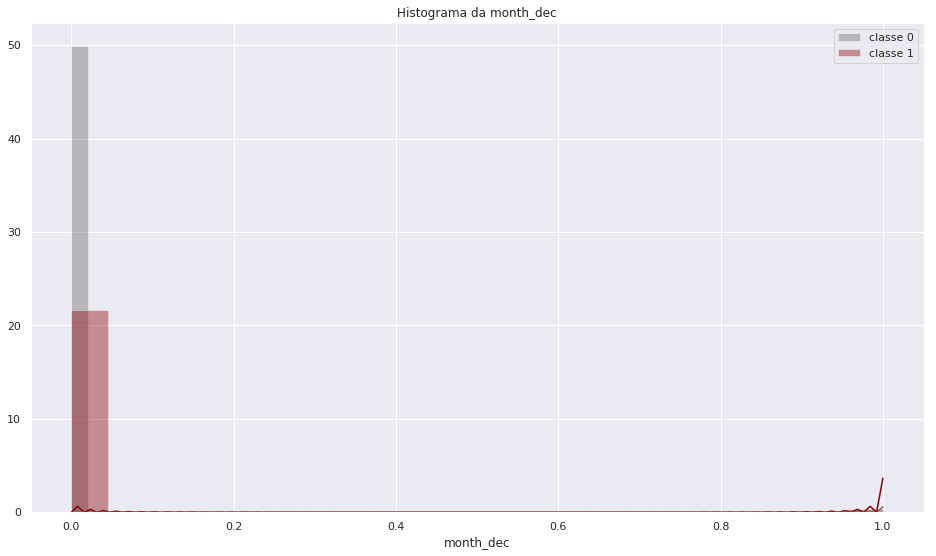

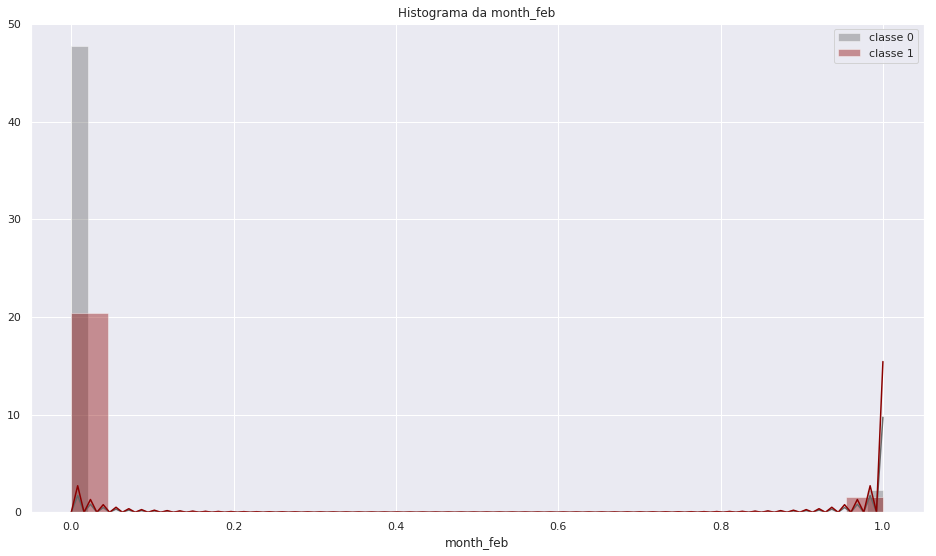

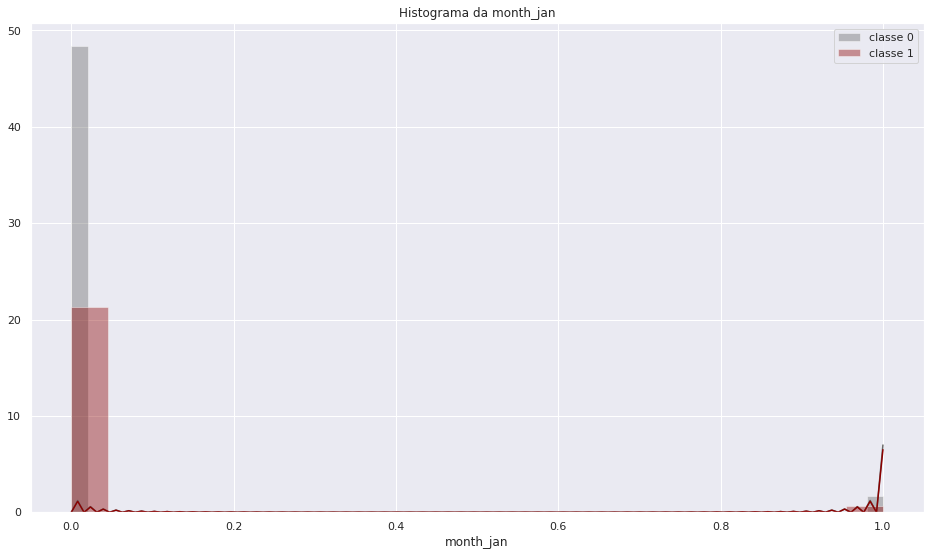

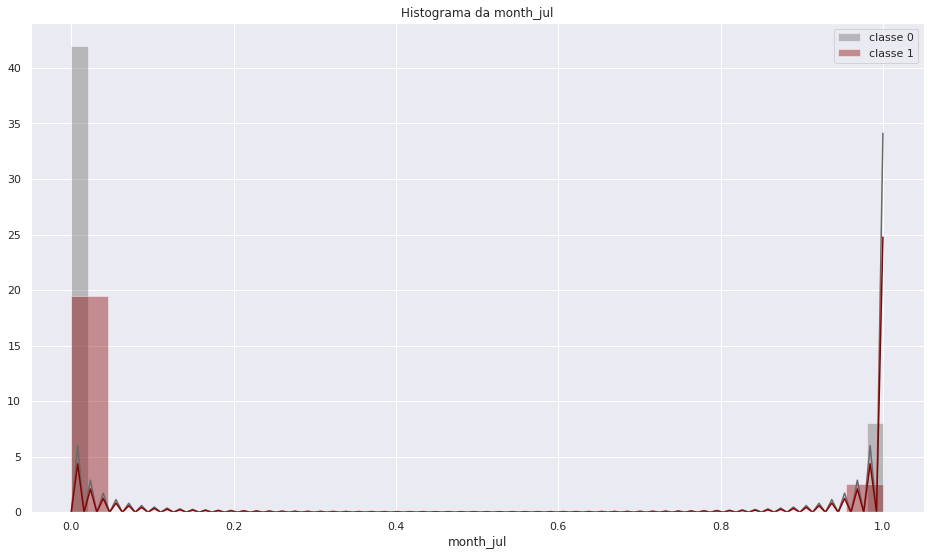

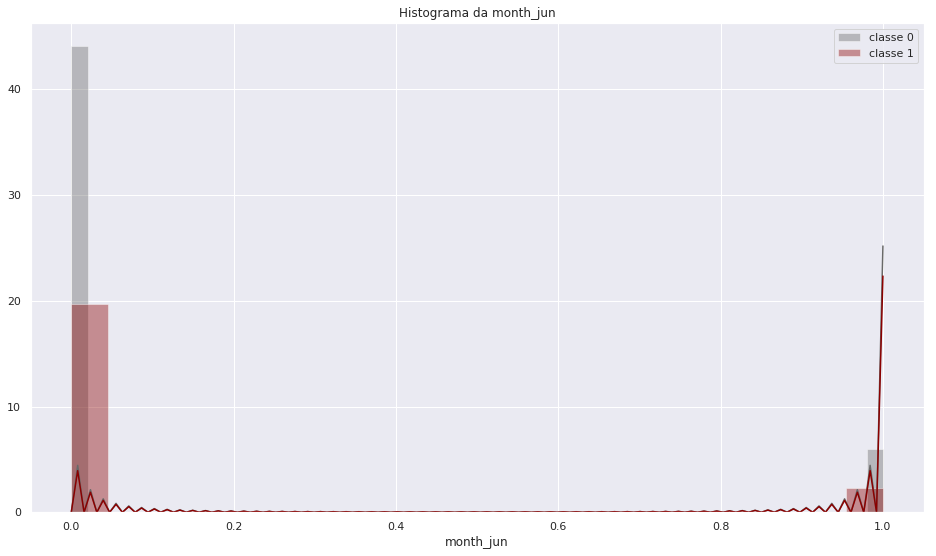

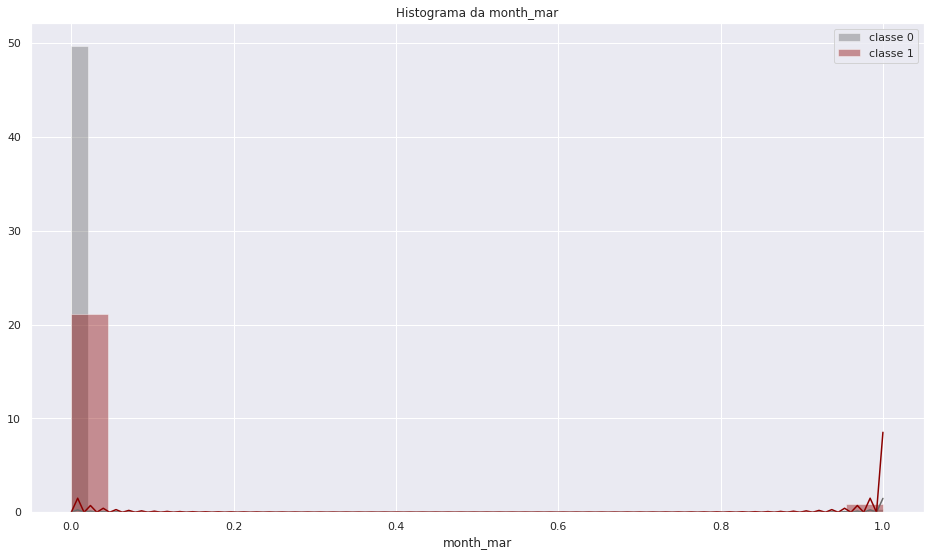

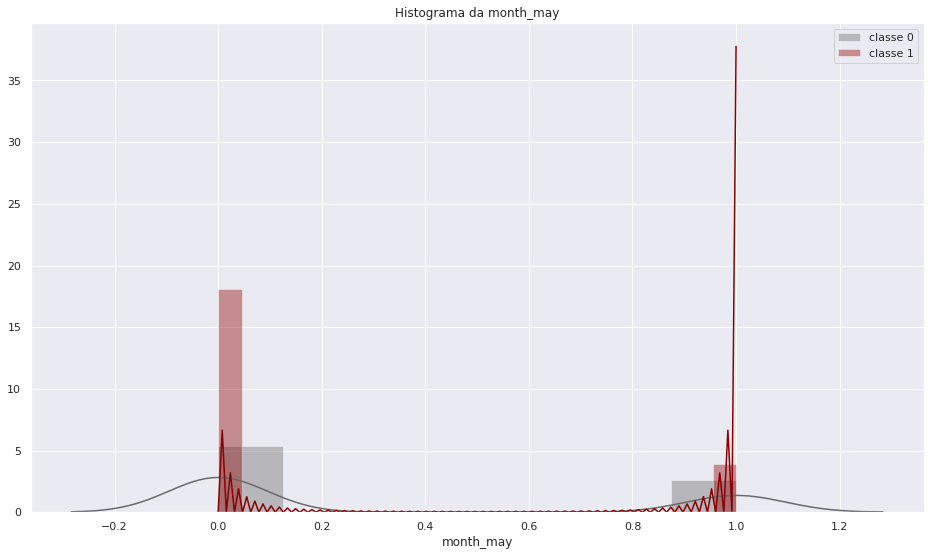

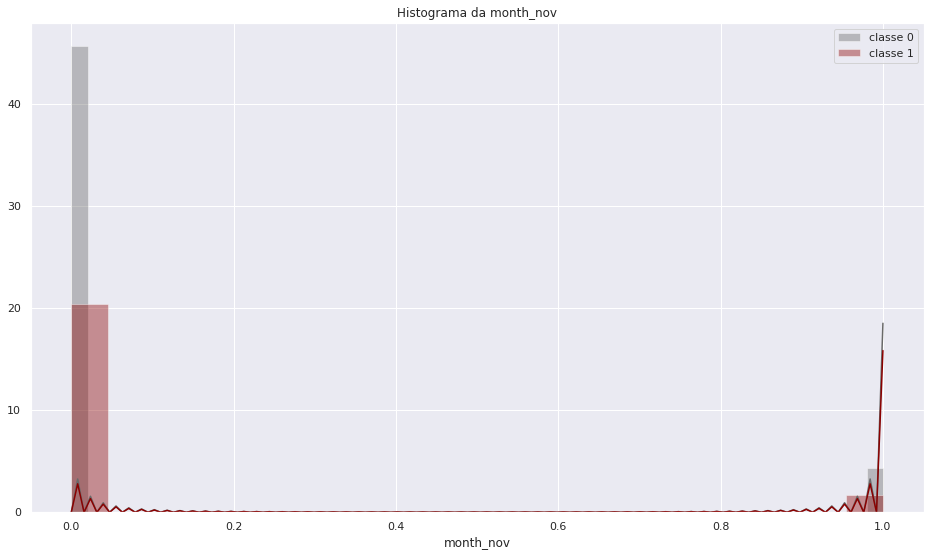

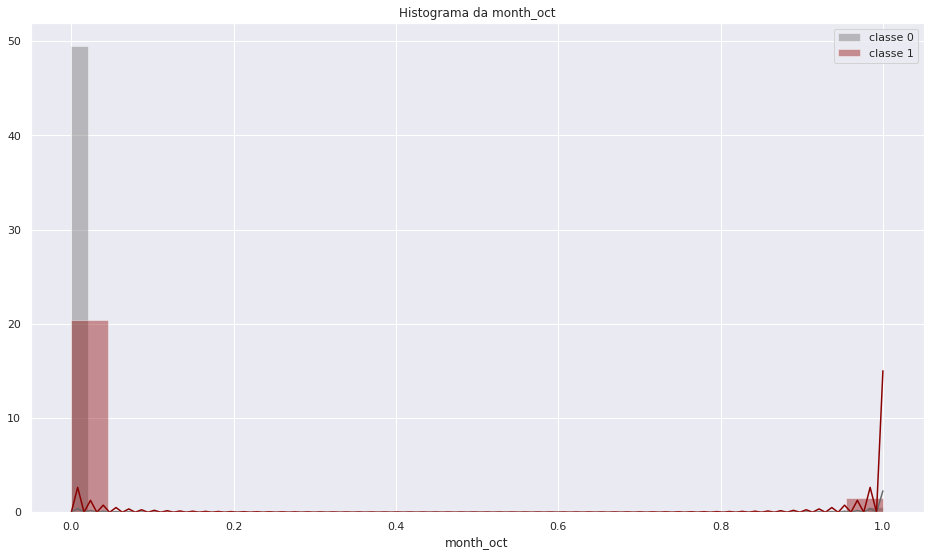

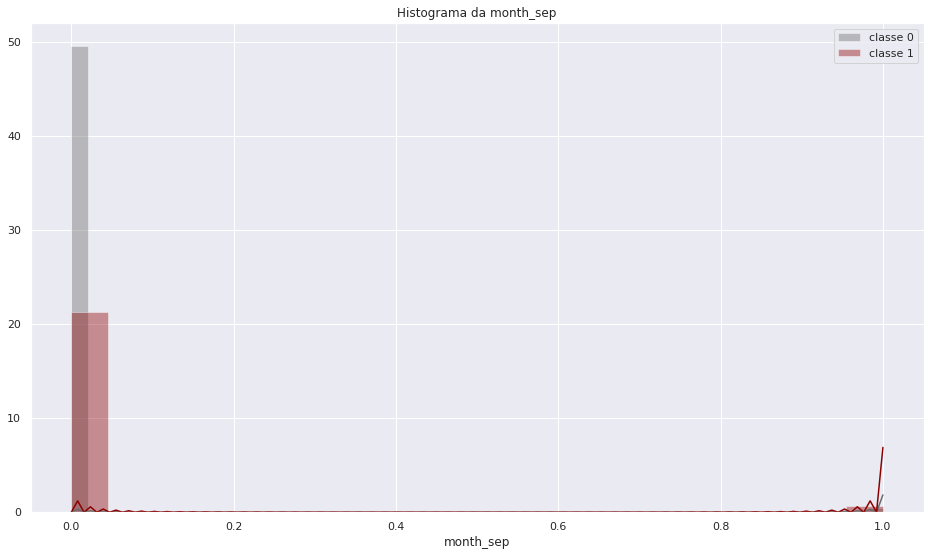

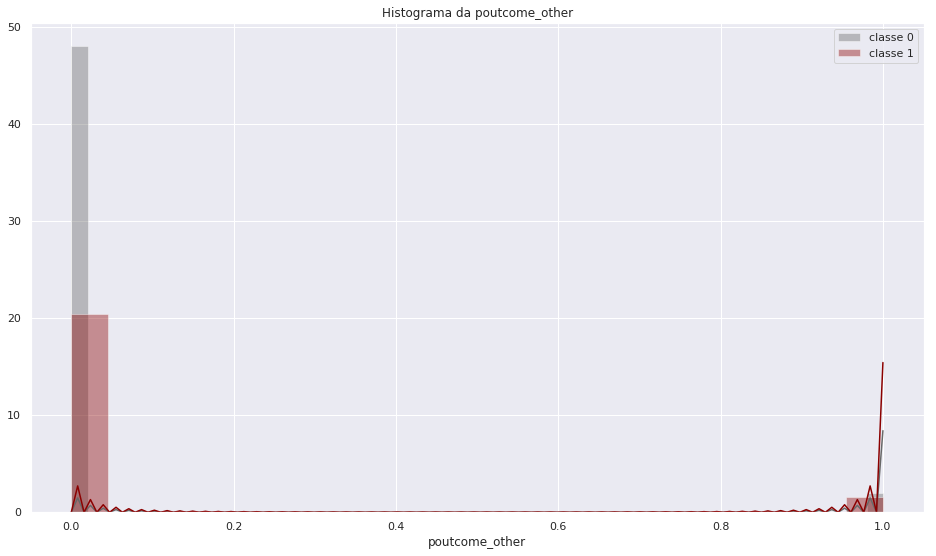

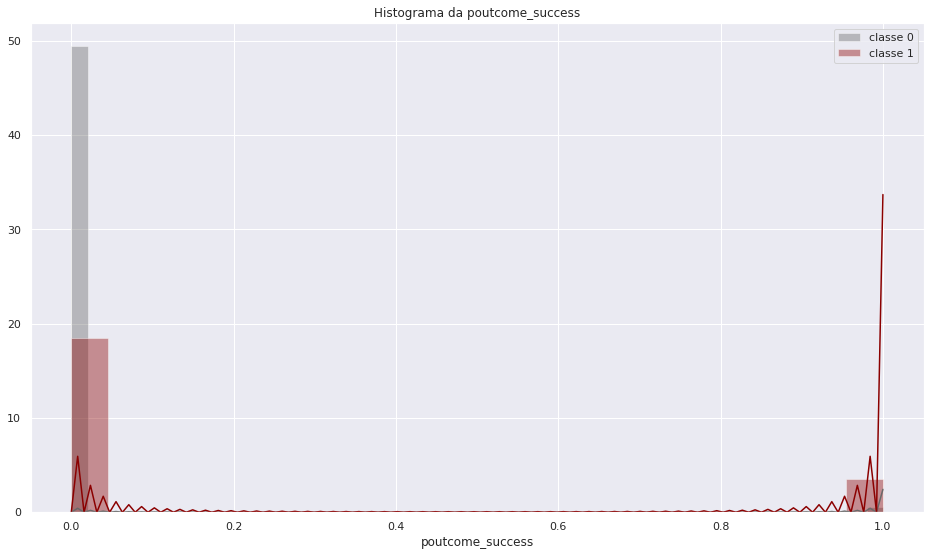

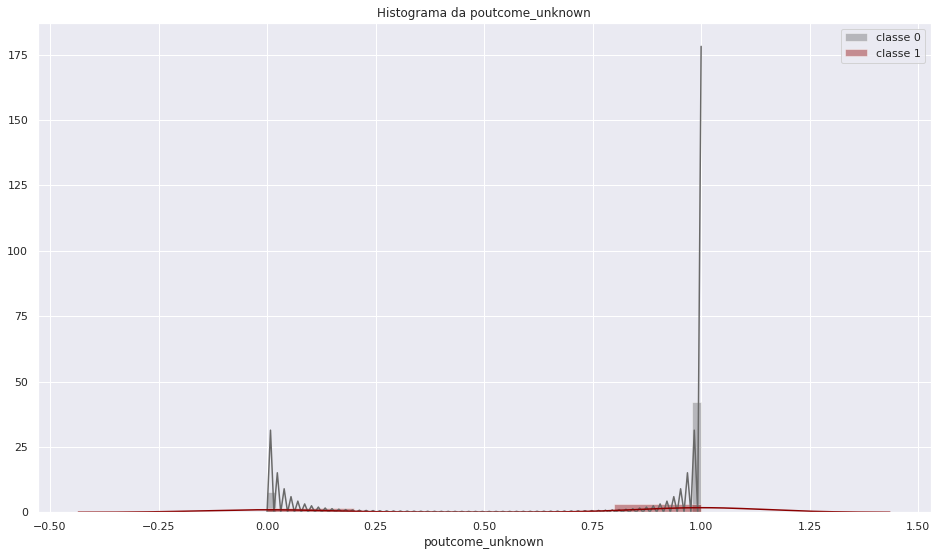

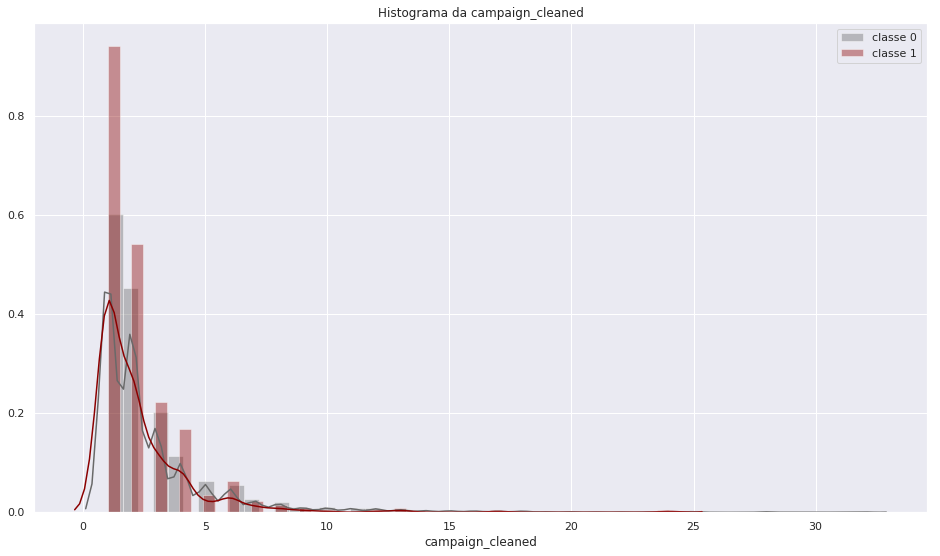

In [14]:
columns = df.drop(columns="y").columns
idx = df["y"] == 0

for col in columns:
    plt.figure(figsize=(16, 9))
    sns.distplot(df[idx][col], label="classe 0", color="dimgrey")
    sns.distplot(df[~idx][col], label="classe 1", color="darkred")
    plt.title(f"Histograma da {col}")
    plt.legend()
    plt.show()
    print("\n\n")
    



---



## Item 2

In [0]:
def classify(model, data, name):
    x_train, x_test, y_train, y_test = train_test_split(data.drop(columns="y"), data["y"], 
                                                        random_state=42, stratify=data["y"],
                                                       test_size=0.2)
        
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    
    print("Resultado para", name, ":")
    acc = accuracy_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    
    print("ACC:", acc, "Recall:", rec, "f1:", f1)
    print()
    
    
     
# Vamos rodar a função mais a frente.        



---



## Item 3

Para estimar o classificador, utilizaremos a técnica de holdout, com p = 0.8 (isto é usando 80% dos dados para treino e 20% para teste). Assim garantimos ter uma métrica de resultado sobre dados nunca vistos pelo classificador.

* * * 

## Item 4

Vamos considerar 3 métricas:

- Acurácia: Facilmente interpretável.

- Recall: taxa de verdadeiros positivos. Para sabermos de todos que são positivos, quanto estamos acertando.

- F1 score:  Uma métrica que leva em consideração tanto a precision como o recall, para podermos balancear os dois.

* * *


## Item 5

In [16]:
classify(KNeighborsClassifier(n_neighbors=3), df, "3-NN")
classify(KNeighborsClassifier(n_neighbors=5), df, "5-NN")
classify(Perceptron(random_state=42, max_iter=1000, tol=1e-3), df, "Perceptron")

Resultado para 3-NN :
ACC: 0.8674033149171271 Recall: 0.20192307692307693 f1: 0.25925925925925924

Resultado para 5-NN :
ACC: 0.8729281767955801 Recall: 0.16346153846153846 f1: 0.22818791946308728

Resultado para Perceptron :
ACC: 0.8530386740331491 Recall: 0.15384615384615385 f1: 0.19393939393939397



Conforme os resultados acima, podemos considerar 3-NN como o melhor classificador;

Entre os dois K-NN, ambos tiveram uma acurácia boa quando comparado ao perceptron, mas o consideramos que o 3-NN se destacou pelo melhor recall e f1 score.
Já o Perceptron, por mais que tenha tido uma acurácia comparável aos K-NNs, teve um recall baixo (indicando que teve mais alta quantidade de falsos negativos) e um f1 score também baixo.

---


